<a href="https://colab.research.google.com/github/tabrejmsc/Machine-Learning-Foundations-A-Case-Study-Approach/blob/master/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [54]:
from numpy import *
path1='/content/drive/My Drive/data/train/malignant'
listing = os.listdir(path1)
num_samples=size(listing)
print(num_samples)

1000


In [0]:
train_dir = os.path.join('/content/drive/My Drive/data', 'train')
validation_dir = os.path.join('/content/drive/My Drive/data', 'validation')
train_benign_dir = os.path.join(train_dir, 'benign')  # directory with our training cat pictures
train_malignant_dir = os.path.join(train_dir, 'malignant')  # directory with our training dog pictures
validation_benign_dir = os.path.join(validation_dir, 'benign')  # directory with our validation cat pictures
validation_malignant_dir = os.path.join(validation_dir, 'malignant')  # directory with our validation dog pictures

In [0]:
num_benign_tr = len(os.listdir(train_benign_dir))
num_malignant_tr = len(os.listdir(train_malignant_dir))

num_benign_val = len(os.listdir(validation_benign_dir))
num_malignant_val = len(os.listdir(validation_malignant_dir))

total_train = num_benign_tr + num_malignant_tr
total_val = num_benign_val + num_malignant_val

In [57]:
print('total training benign images:', num_benign_tr)
print('total training malignant images:', num_malignant_tr)

print('total validation benign images:', num_benign_val)
print('total validation malignant images:', num_malignant_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training benign images: 1000
total training malignant images: 1000
total validation benign images: 200
total validation malignant images: 200
--
Total training images: 2000
Total validation images: 400


In [0]:
batch_size = 32
epochs = 10
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [61]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [62]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 400 images belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

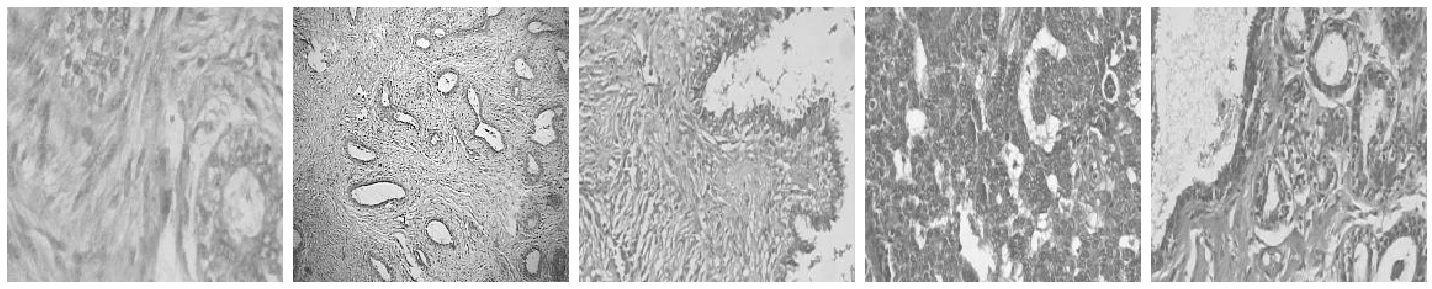

In [65]:
plotImages(sample_training_images[:5])

In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)            

In [69]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/10
62/62 [==============================] - 113s 2s/step - loss: 0.9702 - acc: 0.6026 - val_loss: 0.7099 - val_acc: 0.5208
Epoch 2/10
62/62 [==============================] - 112s 2s/step - loss: 0.4773 - acc: 0.7835 - val_loss: 1.3367 - val_acc: 0.6224
Epoch 3/10
62/62 [==============================] - 111s 2s/step - loss: 0.4323 - acc: 0.8049 - val_loss: 1.7656 - val_acc: 0.6042
Epoch 4/10
62/62 [==============================] - 113s 2s/step - loss: 0.4061 - acc: 0.8303 - val_loss: 1.7283 - val_acc: 0.6172
Epoch 5/10
62/62 [==============================] - 113s 2s/step - loss: 0.3338 - acc: 0.8618 - val_loss: 1.6779 - val_acc: 0.5964
Epoch 6/10
62/62 [==============================] - 111s 2s/step - loss: 0.3885 - acc: 0.8211 - val_loss: 1.1751 - val_acc: 0.5417
Epoch 7/10
62/62 [==============================] - 111s 2s/step - loss: 0.2985 - acc: 0.8806 - val_loss: 1.5891 - val_acc: 0.5703
Epoch 8/10
62/62 [==============================] - 113s 2s/step - loss: 0.2996 - a

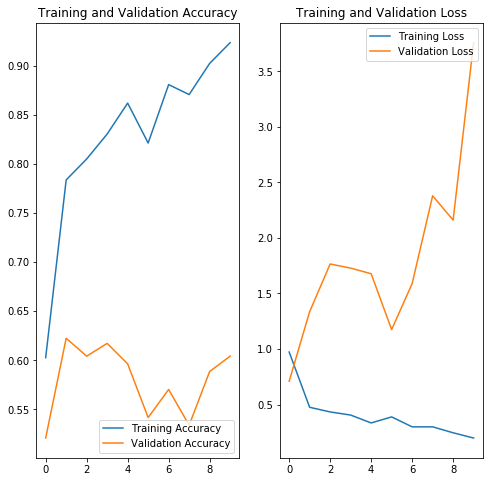

In [72]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [74]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [0]:
#Randomly rotate the image
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

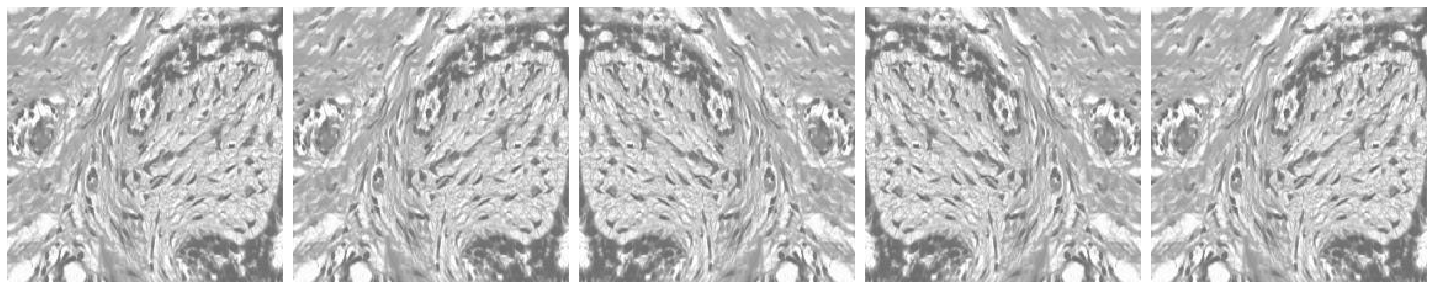

In [77]:
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


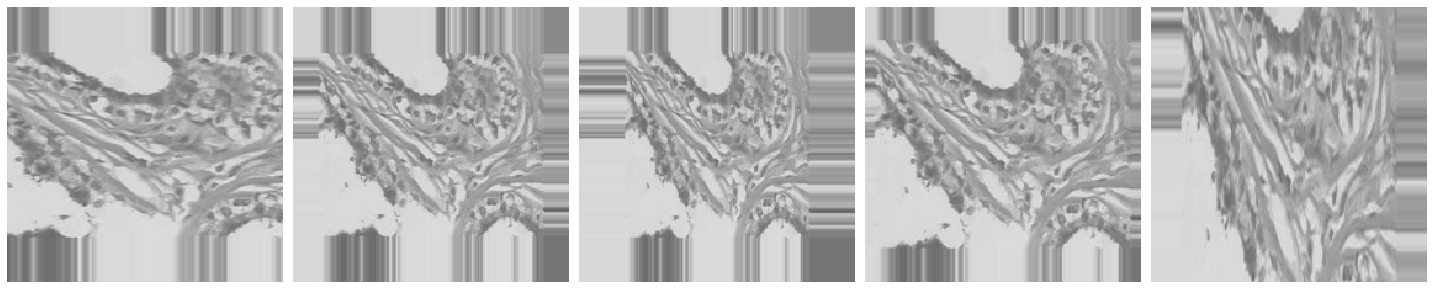

In [78]:
#Apply zoom augmentation
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) 
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [80]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


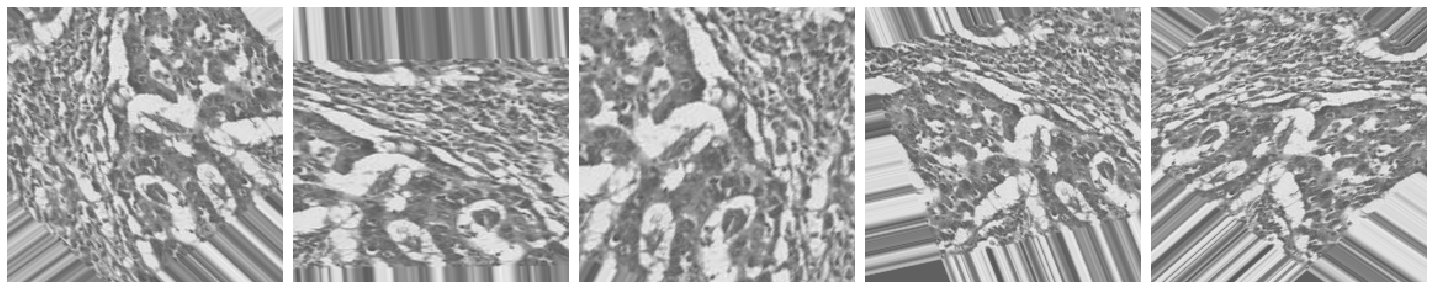

In [81]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [83]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 400 images belonging to 2 classes.


In [0]:
#Creating a new network with Dropouts
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [85]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 28, 28, 64)       

In [86]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/10
62/62 [==============================] - 137s 2s/step - loss: 1.2418 - acc: 0.5335 - val_loss: 0.6943 - val_acc: 0.5078
Epoch 2/10
62/62 [==============================] - 136s 2s/step - loss: 0.6202 - acc: 0.6570 - val_loss: 1.1387 - val_acc: 0.5443
Epoch 3/10
62/62 [==============================] - 137s 2s/step - loss: 0.4838 - acc: 0.7724 - val_loss: 1.9167 - val_acc: 0.5443
Epoch 4/10
62/62 [==============================] - 136s 2s/step - loss: 0.4380 - acc: 0.8023 - val_loss: 1.2240 - val_acc: 0.6016
Epoch 5/10
62/62 [==============================] - 137s 2s/step - loss: 0.4512 - acc: 0.8009 - val_loss: 1.6719 - val_acc: 0.6458
Epoch 6/10
62/62 [==============================] - 136s 2s/step - loss: 0.3851 - acc: 0.8340 - val_loss: 1.2317 - val_acc: 0.6068
Epoch 7/10
62/62 [==============================] - 134s 2s/step - loss: 0.4157 - acc: 0.8155 - val_loss: 1.9343 - val_acc: 0.6250
Epoch 8/10
62/62 [==============================] - 132s 2s/step - loss: 0.3934 - a

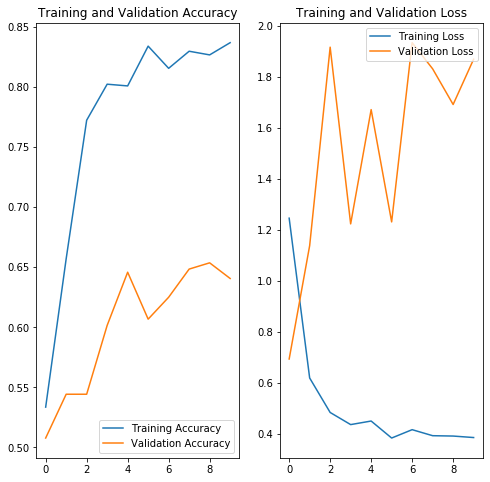

In [87]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()